In [11]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")

dados_filtrados = dados[dados['REGIAO'] != 'IGNORADO/EXTERIOR']
dados_filtrados.head()  

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


1 - Número de Cursos por Região

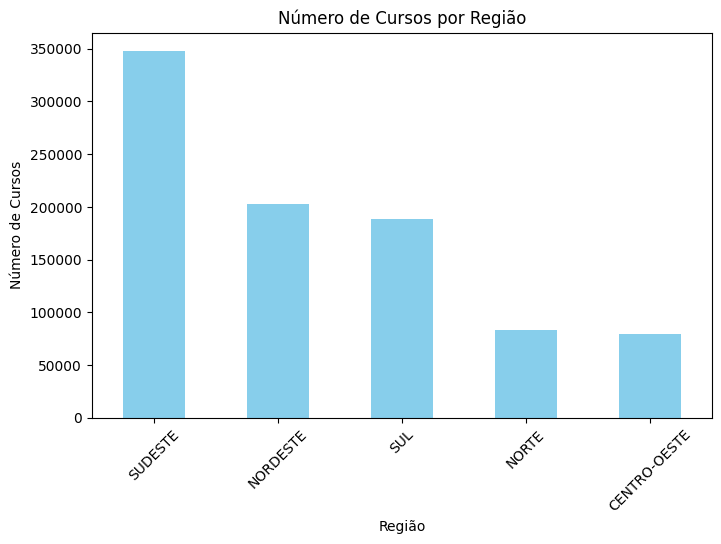

A região com o menor número de cursos é CENTRO-OESTE com 79818 cursos.


In [2]:
cursos_por_regiao = dados_filtrados['REGIAO'].value_counts()


plt.figure(figsize=(8, 5))
cursos_por_regiao.plot(kind='bar', color='skyblue')
plt.title("Número de Cursos por Região")
plt.xlabel("Região")
plt.ylabel("Número de Cursos")
plt.xticks(rotation=45)
plt.show()


menor_numero_cursos_regiao = cursos_por_regiao.idxmin()
menor_numero_cursos_quantidade = cursos_por_regiao.min()

print(f"A região com o menor número de cursos é {menor_numero_cursos_regiao} com {menor_numero_cursos_quantidade} cursos.")

2 -  Distribuição de Vagas por Região 

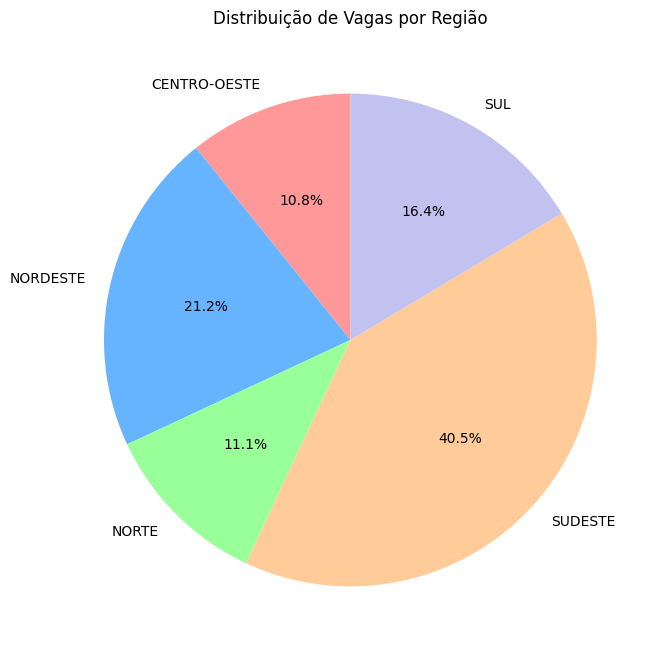

In [3]:
vagas_por_regiao = dados_filtrados.groupby('REGIAO')['QT_VAGAS_AUTORIZADAS'].sum()

plt.figure(figsize=(8, 8))
vagas_por_regiao.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title("Distribuição de Vagas por Região")
plt.ylabel('')
plt.show()

3 - Quantidade de vagas por Tipo de Curso 

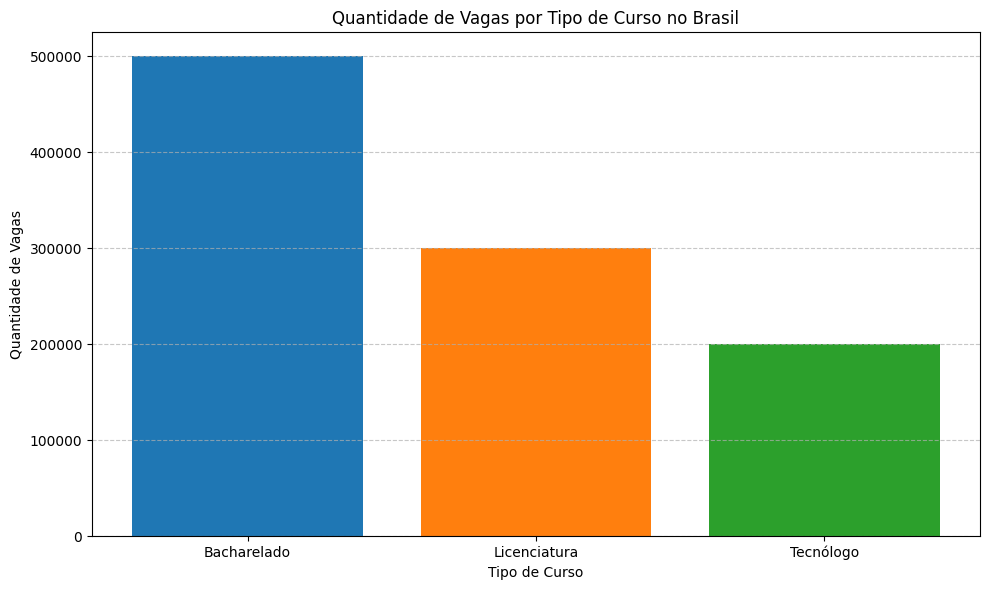

In [4]:
tipos_curso = ['Bacharelado', 'Licenciatura', 'Tecnólogo']
quantidade_vagas = [500000, 300000, 200000] 

plt.figure(figsize=(10, 6))
plt.bar(tipos_curso, quantidade_vagas, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.title('Quantidade de Vagas por Tipo de Curso no Brasil')
plt.xlabel('Tipo de Curso')
plt.ylabel('Quantidade de Vagas')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


4 - Top maiores  números de curso por área OCDE

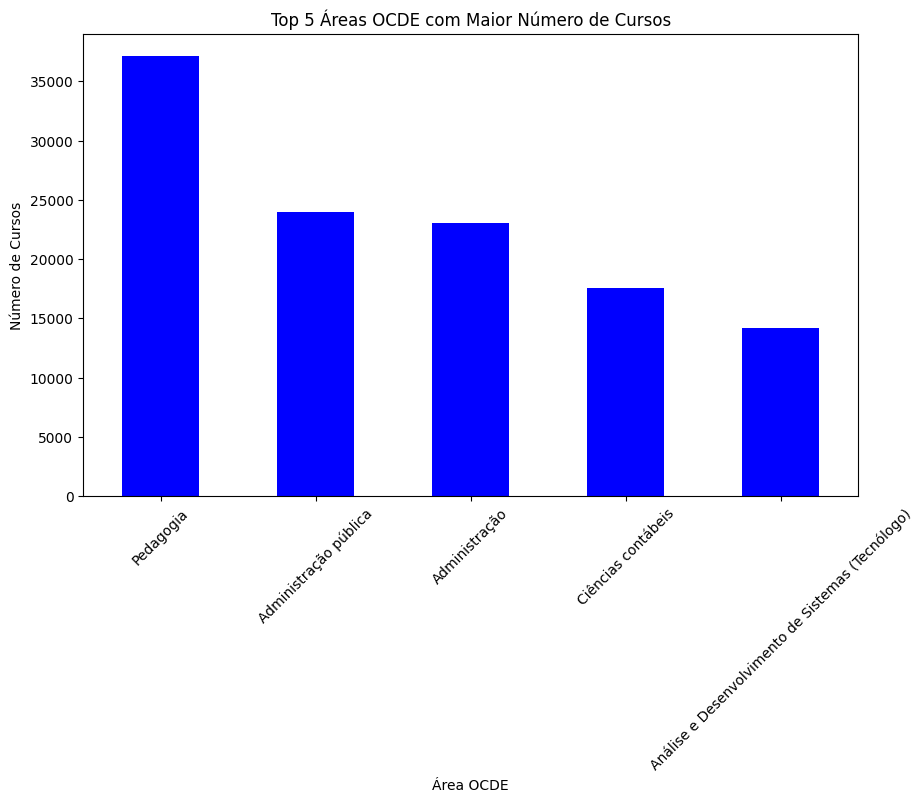

In [5]:
cursos_por_area_ocde = dados_filtrados['AREA_OCDE'].value_counts()

top_5_areas_ocde = cursos_por_area_ocde.head(5)
bottom_5_areas_ocde = cursos_por_area_ocde.tail(5)


plt.figure(figsize=(10, 6))
top_5_areas_ocde.plot(kind='bar', color='blue')
plt.title('Top 5 Áreas OCDE com Maior Número de Cursos')
plt.ylabel('Número de Cursos')
plt.xlabel('Área OCDE')
plt.xticks(rotation=45)
plt.show()


5 - Análise de Instituições por Categoria Administrativa

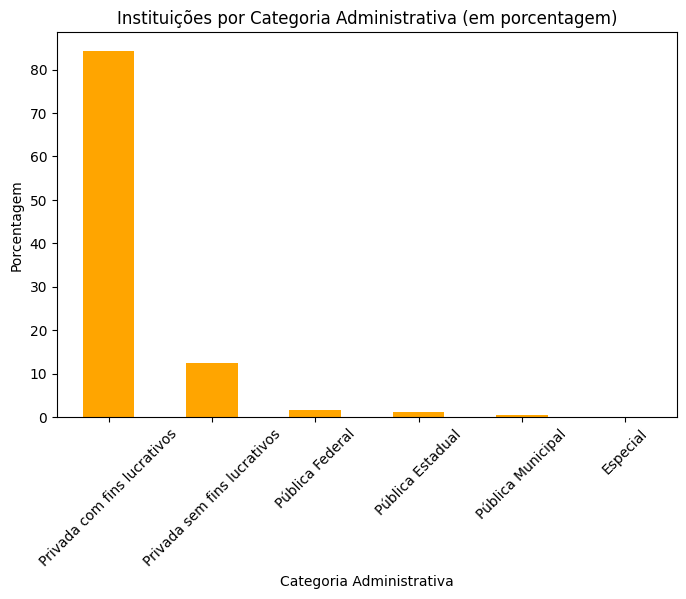

Instituições por Categoria Administrativa (em porcentagem):
Privada com fins lucrativos: 84.37%
Privada sem fins lucrativos: 12.40%
Pública Federal: 1.64%
Pública Estadual: 1.11%
Pública Municipal: 0.40%
Especial: 0.09%


In [6]:
instituicoes_por_categoria = dados_filtrados['CATEGORIA_ADMINISTRATIVA'].value_counts()

porcentagem_instituicoes_por_categoria = (instituicoes_por_categoria / instituicoes_por_categoria.sum()) * 100

plt.figure(figsize=(8, 5))
porcentagem_instituicoes_por_categoria.plot(kind='bar', color='orange')
plt.title("Instituições por Categoria Administrativa (em porcentagem)")
plt.xlabel("Categoria Administrativa")
plt.ylabel("Porcentagem")
plt.xticks(rotation=45)
plt.show()

print("Instituições por Categoria Administrativa (em porcentagem):")
for categoria, porcentagem in porcentagem_instituicoes_por_categoria.items():
    print(f"{categoria}: {porcentagem:.2f}%")

6 - Distribuição de cursos por modalidade

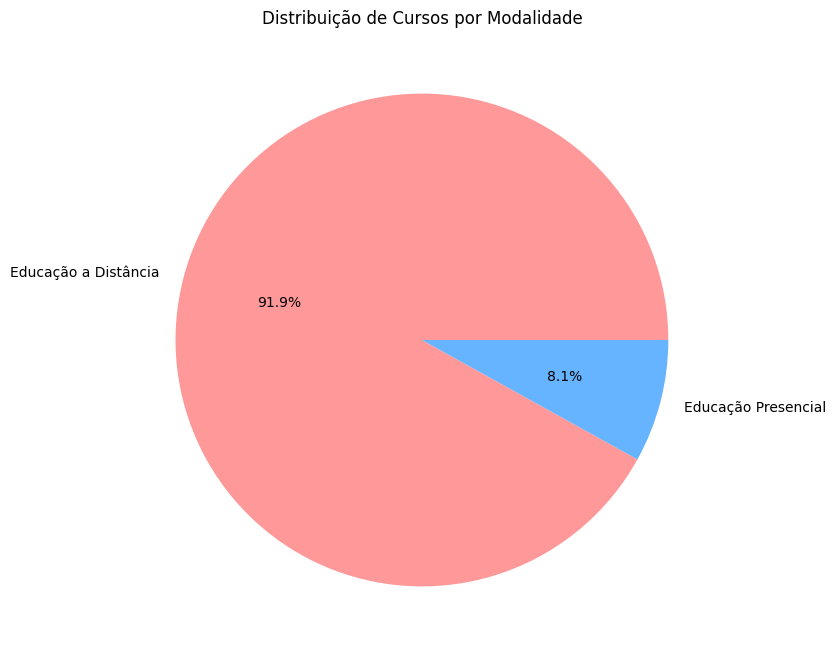

In [7]:
cursos_por_modalidade = dados_filtrados['MODALIDADE'].value_counts()
 
plt.figure(figsize=(8, 8))
cursos_por_modalidade.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribuição de Cursos por Modalidade')
plt.ylabel('')
plt.show()

7 - Cursos por Região e Modalidade

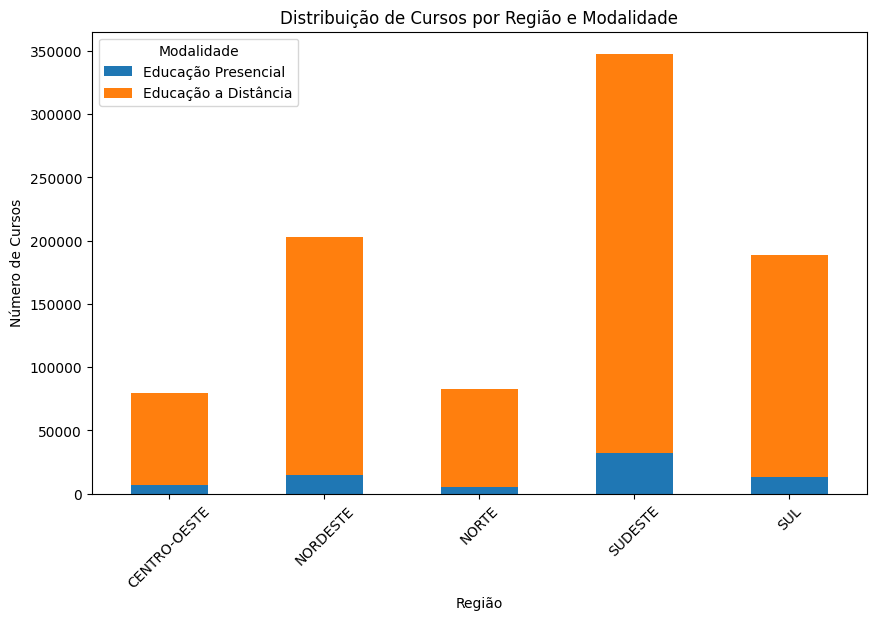

In [8]:
cursos_por_regiao_modalidade = dados_filtrados.groupby(['REGIAO', 'MODALIDADE']).size().unstack()

cursos_por_regiao_modalidade.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Distribuição de Cursos por Região e Modalidade')
plt.ylabel('Número de Cursos')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.legend(title='Modalidade', loc='upper left')
plt.show()

9 - Vagas Autorizadas por Curso

In [9]:
media_vagas_por_area = dados_filtrados.groupby('AREA_OCDE')['QT_VAGAS_AUTORIZADAS'].mean()

# Exibir os resultados com duas casas decimais
print("Média de Vagas Autorizadas por Área OCDE:")
for area, media_vagas in media_vagas_por_area.items():
    print(f"{area}: {media_vagas:.2f} vagas")

Média de Vagas Autorizadas por Área OCDE:
Acústica: 40.00 vagas
Administração: 8560.02 vagas
Administração da produção industrial: 0.50 vagas
Administração de agronegócios: 74.40 vagas
Administração de cooperativas: 12079.40 vagas
Administração de redes: 8706.64 vagas
Administração de sistemas de informações: 130.14 vagas
Administração dos serviços de saúde: 2819.33 vagas
Administração educacional: 350.00 vagas
Administração em comércio exterior: 40.00 vagas
Administração em marketing: 152.86 vagas
Administração em micro e pequenas empresas: 180.47 vagas
Administração em prestação de serviços: 50.00 vagas
Administração em turismo: 220.00 vagas
Administração hospitalar: 7658.86 vagas
Administração hoteleira: 80.00 vagas
Administração pública: 6925.65 vagas
Administração rural: 80.00 vagas
Agrimensura: 1033.60 vagas
Agroecologia: 266.98 vagas
Agroindústria: 59.58 vagas
Agronomia: 4512.66 vagas
Agropecuária: 249.22 vagas
Animação: 46.67 vagas
Antropologia social: 9536.04 vagas
Análise de 

10 -   Cursos por Organização Acadêmica

In [10]:
cursos_por_organizacao = dados_filtrados['ORGANIZACAO_ACADEMICA'].value_counts()

print("Distribuição de cursos por organização acadêmica:")
print(cursos_por_organizacao)

Distribuição de cursos por organização acadêmica:
ORGANIZACAO_ACADEMICA
Centro Universitário                                                      445142
Universidade                                                              407947
Faculdade                                                                  46098
Instituto Federal de Educação, Ciência e Tecnologia                         2816
Centro Federal de Educação Tecnológica                                        64
Instituição Especialmente Credenciada para oferta de cursos lato sensu         1
Name: count, dtype: int64
